### Imports

In [1]:
from glob import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import tqdm
import numpy as np
import os

### Reading datafiles

In [2]:
use_columns = {"HR": [30,150], "DBP": [30, 150], "SBP": [60, 120], "CO": [0,15], "TPR": [1,10], "tl": [-9999], "tr": [-9999], "wr": [-9999]}

In [3]:
bins=20

In [4]:
s1_output_paths = sorted(glob("VU_AMS/s1_output/*.csv", recursive=True), key=lambda x: f'{int(re.search("p([0-9]+)", x).group(1)):03}')[:2]
s2_output_paths = sorted(glob("VU_AMS/s2_output/*.csv", recursive=True), key=lambda x: f'{int(re.search("p([0-9]+)", x).group(1)):03}')

In [5]:
process_paths = s1_output_paths

In [6]:
print(os.path.basename(process_paths[0]))

S1_p1.csv


In [8]:
pbar = tqdm.tqdm(process_paths)
participant_columns_avergage = {}
columns_avergage = {}
avg_loaded_paths = []

  0%|          | 0/2 [00:00<?, ?it/s]

### Calculate average values per participant per column

In [9]:
for participant_path in pbar:
    if participant_path in avg_loaded_paths:
        pbar.set_description("AVG skipping %s" % participant_path)
        continue
    pbar.set_description("AVG Processing %s" % participant_path)
    participant_name = os.path.basename(participant_path)
    if participant_name not in participant_columns_avergage:
        participant_columns_avergage[participant_name] = {}
    df = pd.read_csv(participant_path, header=0)
    # for column_name in df.columns.difference(['timestamp']):
    for column_name in use_columns:
        if len(use_columns[column_name]) > 1:
            df_between = df[column_name][df[column_name].between(use_columns[column_name][0], use_columns[column_name][1], inclusive="both")]
        else:
            df_between = df[column_name][df[column_name] != use_columns[column_name][0]]   
        average_value = df_between.mean()
        participant_columns_avergage[participant_name][column_name] =  average_value
        if column_name not in columns_avergage:
            columns_avergage[column_name] = []
        columns_avergage[column_name].append(average_value)    
        
    avg_loaded_paths.append(participant_path)
    if pbar.n % 5 == 0:
        pbar.set_description("Dump avg values, loaded paths")    

AVG Processing VU_AMS/s1_output/S1_p2.csv: 100%|██████████| 2/2 [01:08<00:00, 34.38s/it]


In [10]:
pd.DataFrame(participant_columns_avergage)

,S1_p1.csv,S1_p2.csv
HR,72.903456,92.045966
DBP,82.461774,69.592564
SBP,117.548387,113.329086
CO,6.647408,9.307083
TPR,1.163451,1.601864
tl,0.288465,0.533867
tr,0.252293,0.362638
wr,10.000150,17.279097


array([[<Axes: title={'center': 'HR'}>, <Axes: title={'center': 'DBP'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'TPR'}>, <Axes: title={'center': 'tl'}>,
        <Axes: title={'center': 'tr'}>, <Axes: title={'center': 'wr'}>]],
      dtype=object)

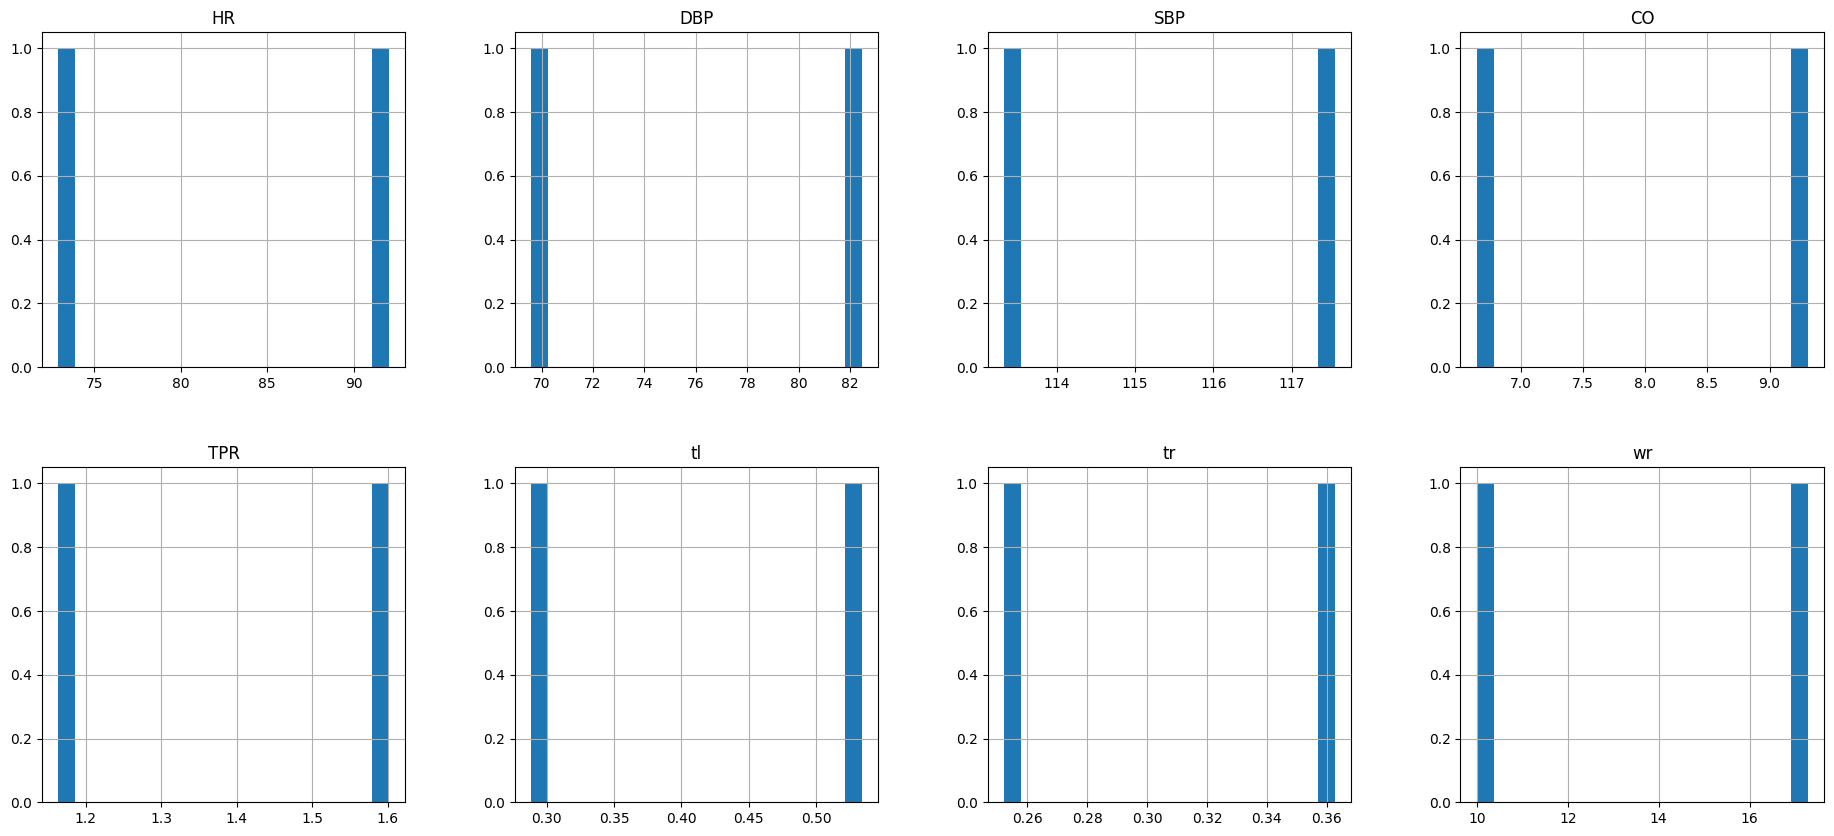

In [8]:
pd.DataFrame(columns_avergage).hist(figsize=(23,10), bins=bins, layout=(2,4))